In [1]:
from FinancialMachineLearning.generator.stochasticprocess import *

In [2]:
stochastic = GeometricBrownianMotion(mu = 0, sigma = 0.028, 
                                          n_paths = 1, n_steps = 10000, 
                                          start = 10, end = 252, initial_price = 1000)

In [3]:
simulation = stochastic.simulate()

In [4]:
simulation

,0
2023-09-20 16:37:11.409205,1000.000000
2023-09-21 16:37:11.409205,1003.012975
2023-09-22 16:37:11.409205,1012.793469
2023-09-25 16:37:11.409205,1018.615600
2023-09-26 16:37:11.409205,1023.400190
...,...
2062-01-12 16:37:11.409205,1240.425337
2062-01-13 16:37:11.409205,1228.284776
2062-01-16 16:37:11.409205,1226.836944
2062-01-17 16:37:11.409205,1218.528525


<Axes: >

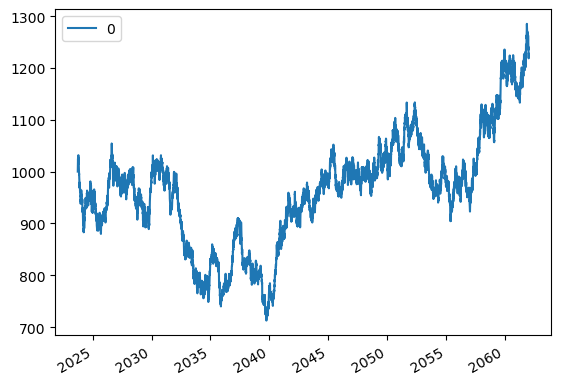

In [5]:
simulation.plot()

In [6]:
from FinancialMachineLearning.features.fracdiff import *

In [7]:
simulation.columns = ['close']

In [8]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 1, 11):
    try:
        df1 = np.log(simulation).dropna()
        df2 = FractionalDifferentiatedFeatures.fracDiff(df1, d = d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index,'close'], df2['close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

d: 0.1, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-1.406209,5.792959e-01,1.0,9998.0,-2.861829,1.000000
0.2,-1.237288,6.573535e-01,1.0,4.0,-4.474365,0.939116
0.3,-1.804185,3.783860e-01,1.0,11.0,-3.189369,0.946460
0.4,-1.257920,6.481976e-01,1.0,27.0,-2.976430,0.895249
0.5,-2.307669,1.695066e-01,1.0,68.0,-2.905087,0.463433
0.6,-5.590100,1.335150e-06,1.0,180.0,-2.877735,0.284958
0.7,-11.464624,5.449075e-21,1.0,513.0,-2.867190,0.304516
0.8,-21.684385,0.000000e+00,1.0,1559.0,-2.863396,0.081066
0.9,-44.107775,0.000000e+00,1.0,4653.0,-2.862161,0.061612
1.0,-70.719510,0.000000e+00,1.0,9997.0,-2.861829,0.025643


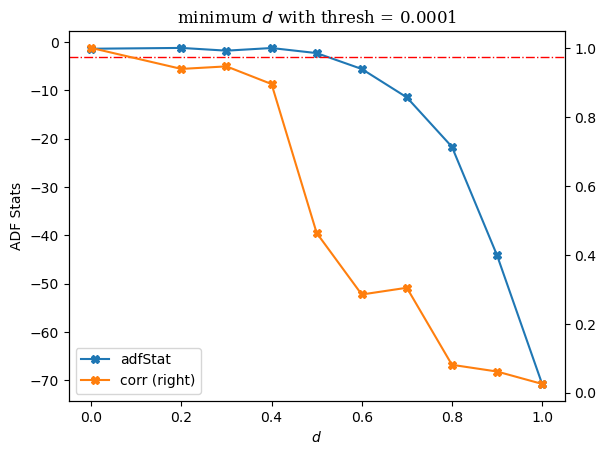

In [9]:
import matplotlib.pyplot as plt
f,ax = plt.subplots()
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
ax.set_title(r'minimum $d$ with thresh = 0.0001', fontfamily = 'Serif', fontsize = 12)
ax.set_xlabel(r'$d$')
ax.set_ylabel('ADF Stats');
display(out)

In [10]:
fracdiff = FractionalDifferentiatedFeatures.fracDiff_FFD(simulation, 0.5)

<Axes: >

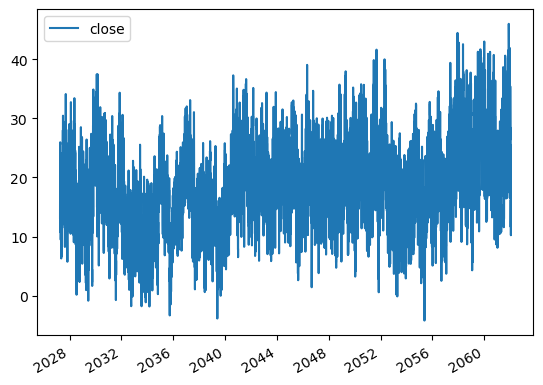

In [11]:
fracdiff.plot()

In [12]:
from FinancialMachineLearning.features.entropy import *
cont_etp = ContinuousEntropy(ret = fracdiff, period = 50)

In [13]:
apen = cont_etp.continuous_entropy()

<Axes: >

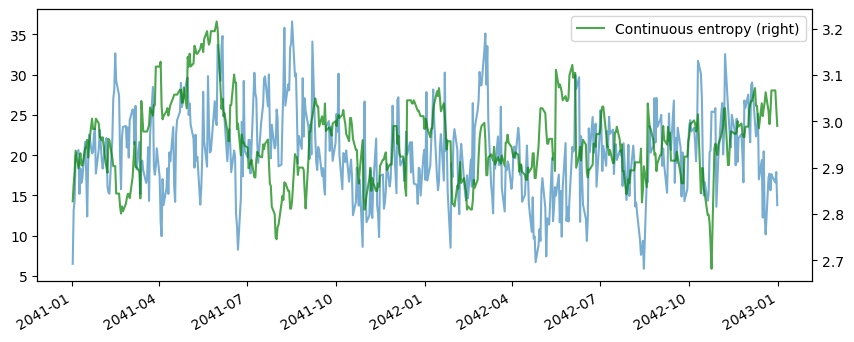

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(fracdiff.loc['2041' : '2042'], alpha = 0.6)
apen.loc['2041' : '2042'].plot(secondary_y = True, ax = ax, alpha = 0.7, color = 'green')

#### Discrete Entropy

In [15]:
fracdiff

,close
2027-04-08 16:37:11.409205,13.181227
2027-04-09 16:37:11.409205,17.109147
2027-04-12 16:37:11.409205,15.824439
2027-04-13 16:37:11.409205,25.930730
2027-04-14 16:37:11.409205,14.094944
...,...
2062-01-12 16:37:11.409205,25.427057
2062-01-13 16:37:11.409205,11.611151
2062-01-16 16:37:11.409205,16.183351
2062-01-17 16:37:11.409205,10.218279


In [16]:
quantile = pd.qcut(fracdiff.close, q = 10, labels = range(10))
quantile

2027-04-08 16:37:11.409205    2
2027-04-09 16:37:11.409205    4
2027-04-12 16:37:11.409205    3
2027-04-13 16:37:11.409205    8
2027-04-14 16:37:11.409205    2
                             ..
2062-01-12 16:37:11.409205    8
2062-01-13 16:37:11.409205    1
2062-01-16 16:37:11.409205    3
2062-01-17 16:37:11.409205    1
2062-01-18 16:37:11.409205    8
Name: close, Length: 9075, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [17]:
message = ''.join(map(str, quantile.values))
message

'243822321433330113342311014262430335486564132342243355878989975455566723345478553653316446436334510114489534255668689553815553772113332312564144221005326425246646862335456465779472648989877773775331377555699877862135388964496631468766798477735665746435744363464117557835126653108432896569698848866554768868222326110021115120015431200104422211210312325323010010041120015353411313011547854200000000003212541587676234762686954458788577745345455483420011011525313133654787546342547642434110123122042223514255226312500300112000001002212347487523176336556623410113626423001202111000021020021132511015433546854131157425752435111324425598666444744402121000000121222313358797865279988888988899867798668687868998788779999959889895887898997888899669999936341265856889699899857353664558765530203366666877559988887682758989879757876888876666688876568458531898342622577575786279748774836765684102511034322677887799356988874744966998996588766558445785741654757675722255244712764235553410105541401022344566217740010

In [19]:
etp = []
for i in range(10, len(message)) :
    etp.append(konto_entropy(message[i-10:i]))
etp = pd.DataFrame(etp, columns = ['Konto Entropy'], index = quantile.index[10:])
etp

,Konto Entropy
2027-04-22 16:37:11.409205,1.407682
2027-04-23 16:37:11.409205,1.407682
2027-04-26 16:37:11.409205,1.207682
2027-04-27 16:37:11.409205,1.507682
2027-04-28 16:37:11.409205,1.598371
...,...
2062-01-12 16:37:11.409205,1.228546
2062-01-13 16:37:11.409205,1.407682
2062-01-16 16:37:11.409205,1.598371
2062-01-17 16:37:11.409205,1.481378


Text(0.5, 1.0, 'Entropy with Geometric Brownian Motion')

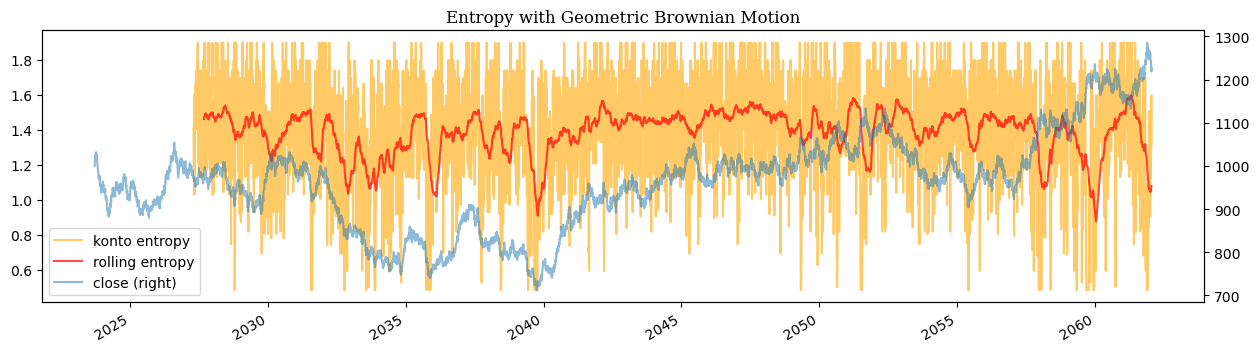

In [29]:
fig, ax = plt.subplots(figsize = (15, 4))
ax.plot(etp, color = 'orange', alpha = 0.6, label = 'konto entropy')
ax.plot(etp.rolling(window = 100).mean(), color = 'red', alpha = 0.7, label = 'rolling entropy')
ax.legend()
simulation.plot(secondary_y = True, ax = ax, alpha = 0.5, label = 'Geometric Brownian Motion')
plt.title('Entropy with Geometric Brownian Motion', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Entropy with Geometric Brownian Motion (window = 50)')

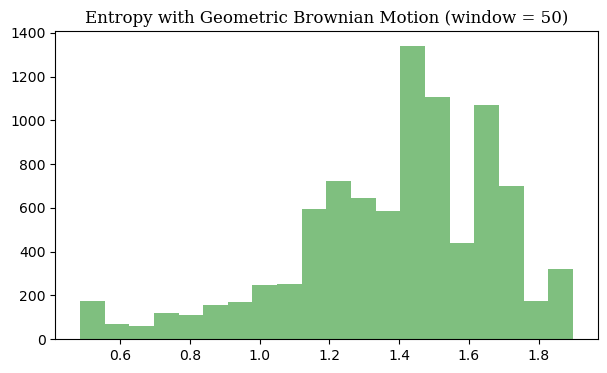

In [21]:
plt.figure(figsize = (7,4))
plt.hist(etp, bins = 20, color = 'g', alpha = 0.5)
plt.title('Entropy with Geometric Brownian Motion (window = 50)', fontsize = 12, fontfamily = 'Serif')